# **Visualizing and Validating the Fundamental Theorem of Calculus with Python**

## **I. Introduction**
An analytical walkthrough of the **Fundamental Theorem of Calculus (FTC)** using computational tools. Through both symbolic and numeric techniques, it validates and visualizes the FTC and provides intuitive insights into how integration and differentiation are inherently connected.

### **Objectives:**
- Demonstrate **FTC1** and **FTC2** computationally.
- Confirm symbolic and numeric integration consistently.
- Show that the derivative of the accumulated area matches the original function $f(x)$.
- Allow user-defined function input to generalize FTC analysis.

## **II. Mathematical Background: Fundamental Theorem of Calculus**

### **Part 1 (FTC1):**
If $f$ is continuous on $[a, b]$, then the function:

$$ F(x) = \int_a^x f(t) dt $$

is continuous on $[a, b]$, differentiable on $(a, b)$, and:

$$ F'(x) = f(x) $$

### **Part 2 (FTC2):**

If $f$ is continuous on $[a, b]$, and $F$ is any antiderivative of $f$, then:

$$ \int_a^b f(x) \, dx = F(b) - F(a) $$

#### **Key Concepts:**
- **Continuity** ensures no jumps or holes in the function.
- **Integrability** means area under curve exists (all continuous functions are integrable).
- FTC connects **area under a curve** to **antiderivatives**

## **III. Conceptual Visualization**

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from scipy import special
from sympy import symbols, integrate, cos, sin, exp, lambdify, diff
from sympy.abc import x
from matplotlib import rcParams
from ipywidgets import interact, FloatSlider
from sympy.parsing.sympy_parser import parse_expr

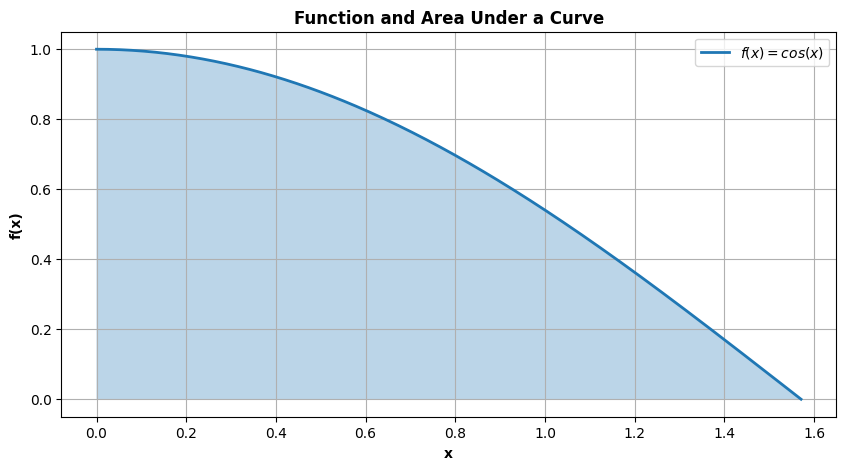

In [35]:
rcParams['figure.figsize'] = (10, 5)

# Define a Function
f = lambda x: np.cos(x)
a, b = 0, np.pi / 2

# Plot f(x) and Shaded Area Under the Curve
x_vals = np.linspace(a, b, 300)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='$f(x) = cos(x)$', linewidth=2)
plt.fill_between(x_vals, y_vals, alpha=0.3)
plt.title('Function and Area Under a Curve', fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('f(x)', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

## **IV. Numeric Integration: FTC1**

In [12]:
# a. Numerical Integration
area_num, _ = quad(f, a, b)

# b. Symbolic Integration
F_sym = integrate(cos(x), x)
F_a = F_sym.subs(x, a).evalf()
F_b = F_sym.subs(x, b).evalf()
area_sym = F_b - F_a

print(f"Numerical Integration (scipy): {area_num}")
print(f"Symbolic Integration (sympy): {area_sym}")

Numerical Integration (scipy): 0.9999999999999999
Symbolic Integration (sympy): 1.00000000000000


## **V. Antiderivative Function Builder: FTC2**

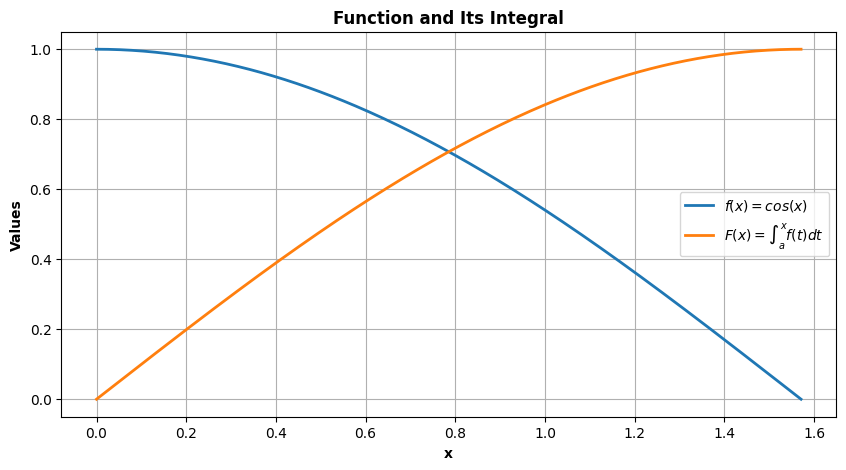

In [34]:
def F(x_val):
  return quad(f, a, x_val)[0]

F_vals = [F(xi) for xi in x_vals]

plt.plot(x_vals, y_vals, label='$f(x) = cos(x)$', linewidth=2)
plt.plot(x_vals, F_vals, label='$F(x) = \int_a^x f(t) dt$', linewidth=2)
plt.title('Function and Its Integral', fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

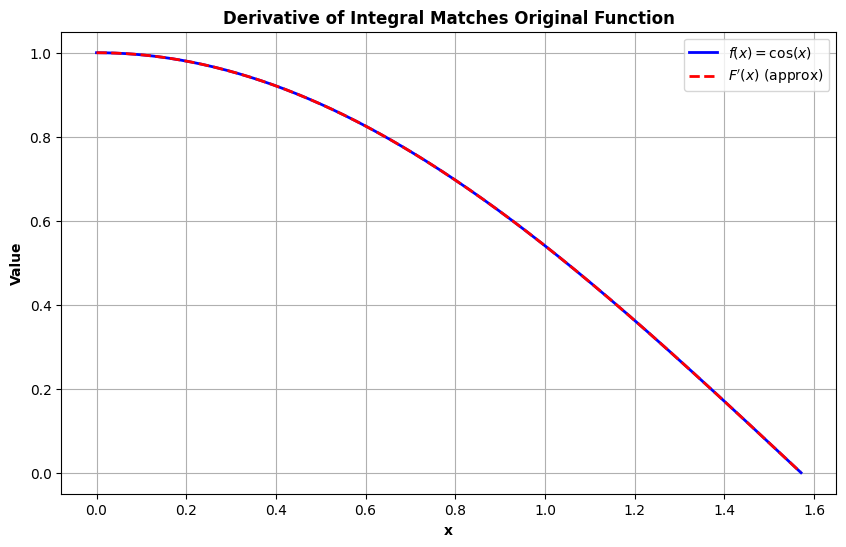

In [31]:
# Derivative Check
F_vals = cumulative_trapezoid(y_vals, x_vals, initial=0)

F_derivative_approx = np.gradient(F_vals, x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = \cos(x)$', color='blue', linewidth=2)
plt.plot(x_vals, F_derivative_approx, '--', label="$F'(x)$ (approx)", color='red', linewidth=2)
plt.title("Derivative of Integral Matches Original Function", fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

## **VI. Interactive F(x) Plot Using IPyWidgets**

In [38]:
def dynamic_integral_plot(x_val):
  f = lambda x: np.cos(x)
  F_val = quad(f, a, x_val)[0]

  x_range = np.linspace(a, np.pi, 300)
  y_range = f(x_range)

  plt.plot(x_range, y_range, label='$f(x) = cos(x)$', linewidth=2)
  plt.fill_between(x_range[x_range <= x_val], y_range[x_range <= x_val],
                   alpha=0.3, color='orange', label=f'$F({x_val:.2f})$')
  plt.axvline(x_val, color='red', linestyle='--')
  plt.title(f"Interactive Area Under f(x) Up to x = {x_val:.2f}", fontweight='bold')
  plt.xlabel('x', fontweight='bold')
  plt.ylabel('f(x)', fontweight='bold')
  plt.legend()
  plt.grid(True)
  plt.show()

interact(dynamic_integral_plot, x_val=FloatSlider(value=1.0, min=a, max=np.pi, step=0.01))

interactive(children=(FloatSlider(value=1.0, description='x_val', max=3.141592653589793, step=0.01), Output())…

<function __main__.dynamic_integral_plot(x_val)>

## **VII. Symbolic Derivative Check**

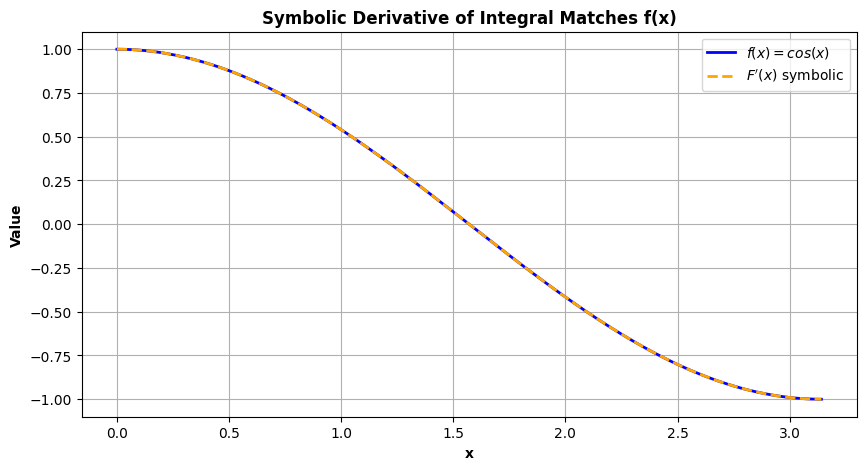

In [42]:
f_sym = cos(x)
F_sym = integrate(f_sym, x)
F_prime = diff(F_sym, x)

f_numeric = lambdify(x, f_sym, modules='numpy')
F_prime_numeric = lambdify(x, F_prime, modules='numpy')

x_plot = np.linspace(0, np.pi, 300)
plt.plot(x_plot, f_numeric(x_plot), label='$f(x) = cos(x)$', color='blue', linewidth=2)
plt.plot(x_plot, F_prime_numeric(x_plot), '--', label="$F'(x)$ symbolic", color='orange', linewidth=2)
plt.title("Symbolic Derivative of Integral Matches f(x)", fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

## **VIII. User-Defined Function Explorer**

*Modify the function input below to explore FTC for custom continuous functions.*

**Examples:**
- **Polynomial Functions:** `x**2`, `x**3 - 2*x + 1`, `x**4 + 3*x**2 + 2`
- **Trigonometric Functions:** `sin(x)**2`, `cos(x) * sin(x)`, `tan(x)`, `1 + sin(2*x)`, `x * cos(x)`
- **Exponential & Logarithmic Functions:** `exp(x)`, `exp(-x**2)`, `log(x + 1)`, `1/(x + 1)`, `x * exp(-x)`
- **Rational and Root Functions:** `(x**2 + 1)/(x + 1)`, `1 / (x**2 + 1)`, `(x**2 + 2*x + 1)/(x + 1)`, `1 / sqrt(x + 1)`, `sqrt(x)`

Enter a mathematical function: x * exp(-x)


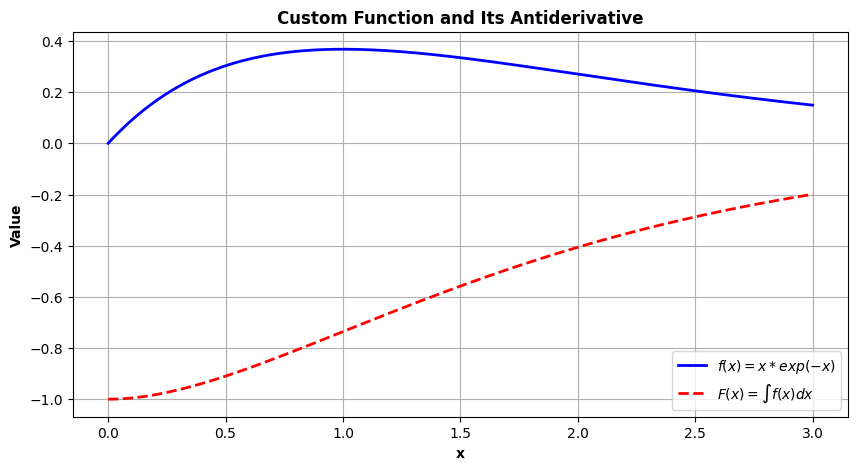

In [84]:
user_input = input("Enter a mathematical function: ")
f_expr = parse_expr(user_input)
f_lamb = lambdify(x, f_expr, modules='numpy')
F_expr = integrate(f_expr, x)
F_lamb = lambdify(x, F_expr, modules=['numpy', {'erf': special.erf}])

x_demo = np.linspace(0, 3, 400)

plt.plot(x_demo, f_lamb(x_demo), label=f"$f(x) = {user_input}$", color='blue', linewidth=2)
plt.plot(x_demo, F_lamb(x_demo), '--', label="$F(x) = \int f(x)dx$", color='red', linewidth=2)
plt.title("Custom Function and Its Antiderivative", fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

## **IX. Conclusion**

This analytical exploration confirms the **Fundamental Theorem of Calculus** using Python tools.

### **Summary of Findings:**
- **FTC1 verified**: $ F(x) = \int_a^x f(t)dt $ is differentiable and $ F'(x) = f(x) $ was matched numerically and symbolically.
- **FTC2 confirmed**: $ \int_a^b f(x)dx = F(b) - F(a) $ using both numerical (`scipy`) and symbolic (`sympy`) integration.
- **Interactive analysis**: Sliders and dynamic plots enhanced understanding of how area accumulation defines the antiderivative.
- **Custom exploration**: Users can define new functions to validate FTC on varied mathematical scenarios.

*This blend of symbolic math, computation, and visualization fosters a robust, conceptual grasp of one of calculus's core theorems.*